## Importing Libraries

In [3]:
# Import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for clean output

# Import ensemble and regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
import xgboost as xgb

# Import additional libraries for preprocessing and evaluation
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Additional import for clarity and completeness
from sklearn.impute import SimpleImputer

# Note: Ensure all necessary packages are installed. Use `pip install` if any package is missing.

## Reading Data

In [4]:
# Load the training dataset
df = pd.read_csv("train.csv")

# Load the test dataset
test = pd.read_csv('test.csv')

## Exploratory Data Analysis (EDA)

In [5]:
# Display the first few rows of the training dataset
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


> ### Column Descriptions:

- Id: Unique identifier for each diamond.
- carat: Weight of the diamond.
- cut: Quality of the diamond cut (e.g., Ideal, Premium).
- color: Color grade of the diamond.
- clarity: Clarity grade of the diamond.
- depth: Total depth percentage (depth as a percentage of average diameter).
- table: Width of the top of the diamond relative to its widest point (percentage).
- price: Price of the diamond in USD.
- x: Length of the diamond in mm.
- y: Width of the diamond in mm.
- z: Depth of the diamond in mm.

> ### Preprocessing Needs:

- Categorical Encoding: The cut, color, and clarity columns will need to be encoded into numerical values. This can be done using One-Hot Encoding or Ordinal Encoding.
- Normalization/Scaling: The numerical columns (carat, depth, table, price, x, y, and z) may need to be normalized or scaled to ensure they are on a similar scale, which can be important for certain algorithms.
- Handling Missing Values: Check for any missing values in the dataset and handle them appropriately (e.g., imputation or removal).

In [6]:
df.duplicated().sum()

0

> **The output indicates that there are no duplicate rows in the dataset. This means each row in the dataset is unique, and there is no need to remove any duplicates.**

> **The absence of duplicate rows is a positive sign, suggesting that the data collection process was likely well-managed and that the dataset is clean in this aspect.**

In [7]:
df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

> **The output indicates that there are no missing values in any of the columns in the dataset. This means that every entry in each column is complete and there is no need for imputation or removal of missing data.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


> **The dataset contains 43,152 entries (rows), indicating a substantial amount of data for analysis and model training.**

In [9]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> **Insights**
- The 'carat' standard deviation of 0.474, indicating some variability in the weights.
- The 'depth' standard deviation of 1.435 suggests that most depth values are close to the mean.
- The 'price' standard deviation of 3985.53 indicates significant variability in diamond prices.
- The presence of zeros in dimensions ('x', 'y', 'z') suggests potential data entry errors or missing values that need to be addressed during preprocessing.

> ### **Next Steps**
**Data Visualization:**
- Visualize Distributions: Create histograms and box plots for numerical features to visualize their distributions and identify outliers.
- Correlation Analysis: Use a correlation matrix or scatter plots to explore relationships between numerical features, particularly with price.

## Data Visualization

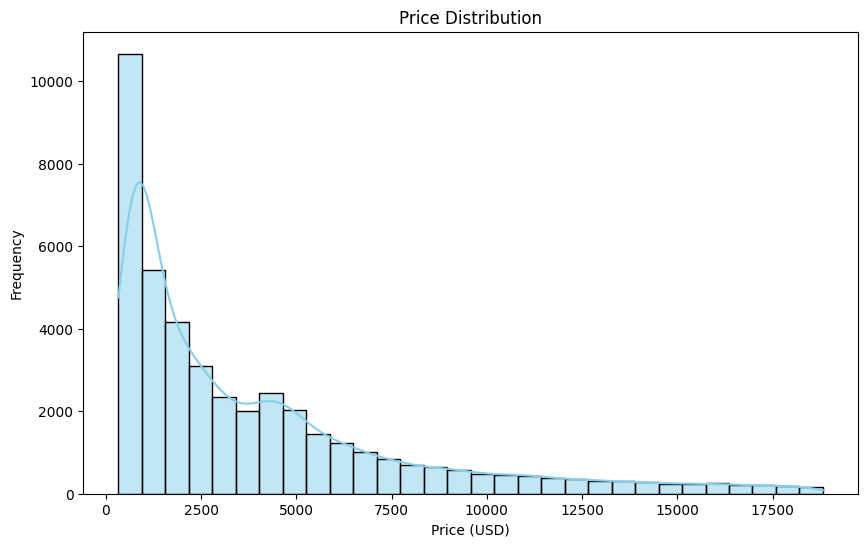

In [7]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

> ### **Insights**
**Skewed Distribution:**

- The histogram shows that the distribution of diamond prices is highly right-skewed. Most diamonds are priced at the lower end of the scale, with a long tail extending towards higher prices.
- The majority of diamond prices fall below $5000 USD, with a significant number below $2500 USD.

**Outliers:**

- There are few diamonds with extremely high prices (up to $18,823 USD), which are outliers in the context of the overall price distribution.

**Implications for Modeling:**

- The skewness of the price distribution may necessitate transformations (e.g., log transformation) to normalize the data before applying certain machine learning models.
- The presence of outliers could impact model performance and may need to be handled separately (e.g., through robust scaling or outlier removal).

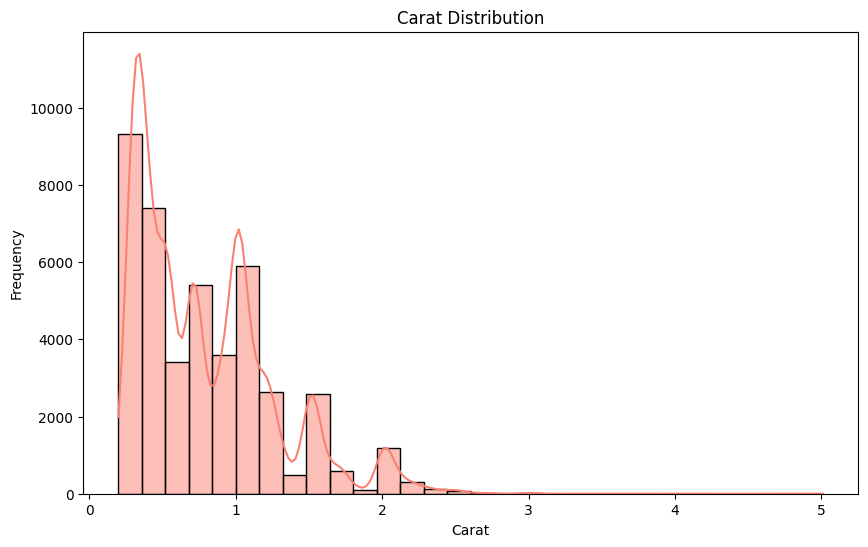

In [8]:
# Carat Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['carat'], bins=30, kde=True, color='salmon')
plt.title('Carat Distribution')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

> ### **Insights**
**Skewed Distribution:**

- The histogram shows that the distribution of diamond carat weights is right-skewed. Most diamonds have a lower carat weight, with a long tail extending towards higher weights.
- The majority of diamonds have a carat weight below 1.5 carats, with a significant number below 1 carat.

**Outliers:**

- There are few diamonds with extremely high carat weights (up to 5.01 carats), which are outliers in the context of the overall carat distribution.

**Implications for Modeling:**

- The skewness of the carat distribution may necessitate transformations (e.g., log transformation) to normalize the data before applying certain machine learning models.

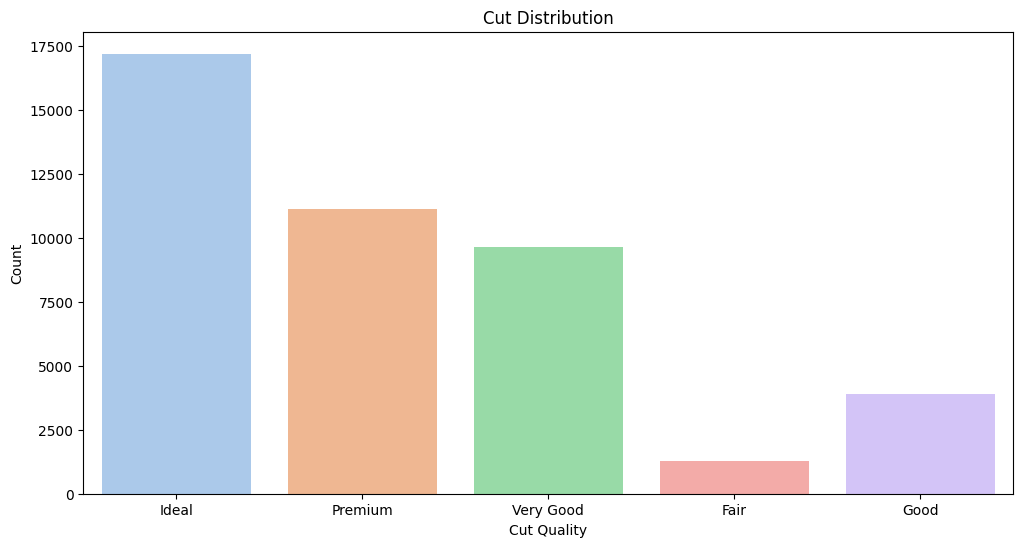

In [9]:
# Categorical Variables
plt.figure(figsize=(12, 6))
sns.countplot(x='cut', data=df, palette='pastel')
plt.title('Cut Distribution')
plt.xlabel('Cut Quality')
plt.ylabel('Count')
plt.show()

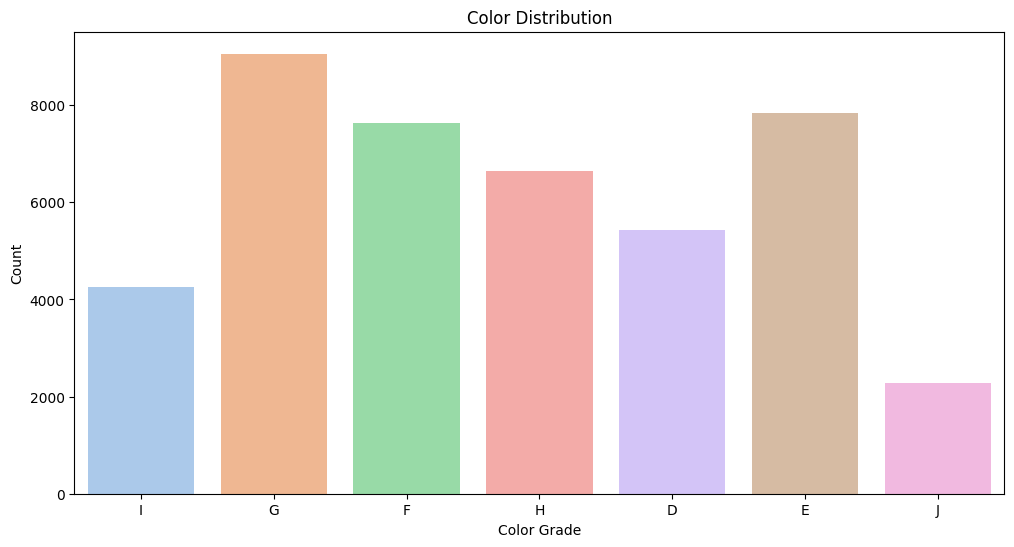

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='color', data=df, palette='pastel')
plt.title('Color Distribution')
plt.xlabel('Color Grade')
plt.ylabel('Count')
plt.show()

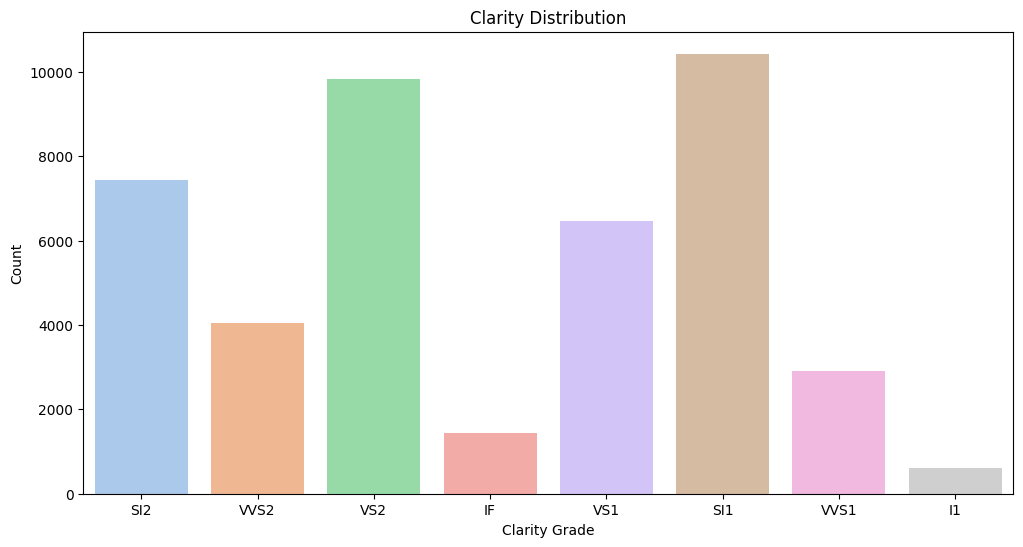

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='clarity', data=df, palette='pastel')
plt.title('Clarity Distribution')
plt.xlabel('Clarity Grade')
plt.ylabel('Count')
plt.show()

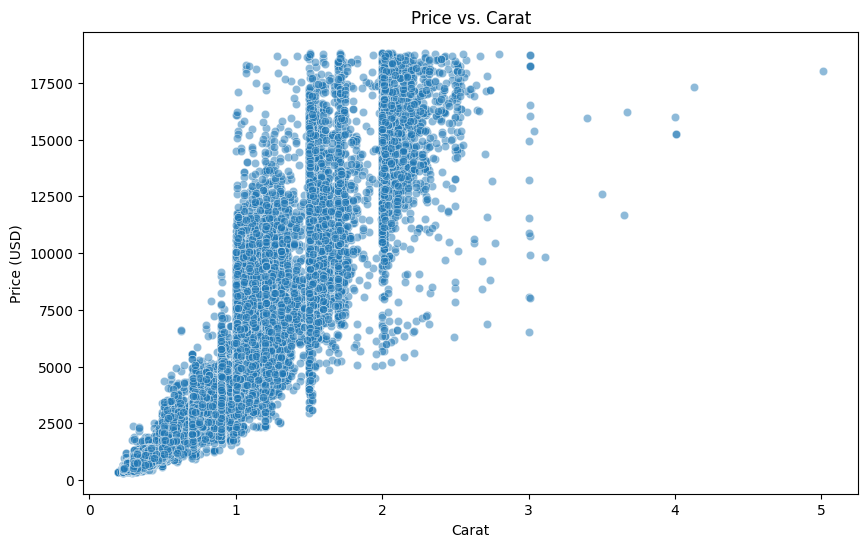

In [12]:
# Price vs. Carat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.5)
plt.title('Price vs. Carat')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.show()


> ### **Insights:**
**Positive Correlation:**

- There is a noticeable positive correlation between carat and price, indicating that as the carat weight of a diamond increases, its price also tends to increase.
- This relationship is expected as larger diamonds are typically more valuable.

**Variability in Prices:**

- While there is a general upward trend, there is significant variability in prices for diamonds of the same carat weight. This suggests that other factors (e.g., cut, color, clarity) also play important roles in determining the price.
- For example, diamonds with a carat weight around 1 can have prices ranging from a few thousand dollars to over $10,000.

**Density and Outliers:**

- Most data points are densely packed in the lower carat ranges (below 2 carats), reflecting the higher frequency of smaller diamonds.
- There are some outliers with extremely high prices for their carat weight, indicating that exceptional quality or rarity can lead to significantly higher prices.

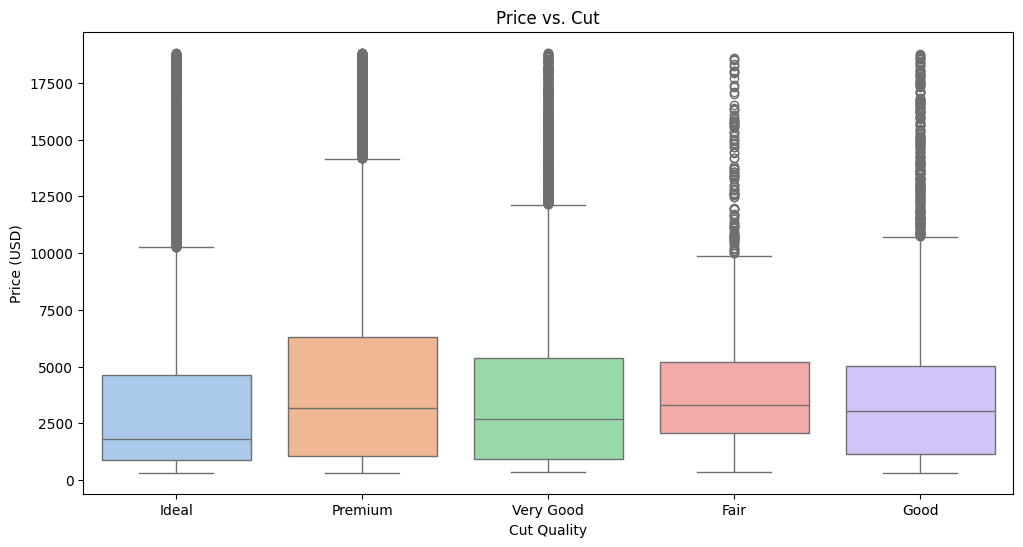

In [13]:
# Price vs. Cut
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df, palette='pastel')
plt.title('Price vs. Cut')
plt.xlabel('Cut Quality')
plt.ylabel('Price (USD)')
plt.show()

> ### **Insights**

- The price of diamonds tends to increase with better cut quality.
- Diamonds with an 'Fair' cut have the highest median price, followed by 'Premium' and 'Very Good' cuts.


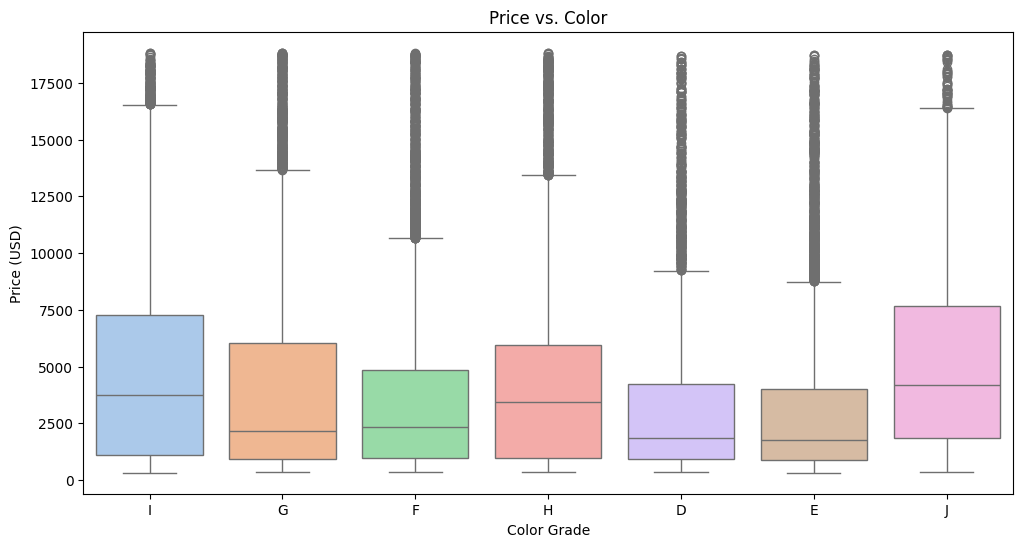

In [14]:
# Price vs. Color
plt.figure(figsize=(12, 6))
sns.boxplot(x='color', y='price', data=df, palette='pastel')
plt.title('Price vs. Color')
plt.xlabel('Color Grade')
plt.ylabel('Price (USD)')
plt.show()

> ### **Insights**

- Diamonds with a 'J' color grade, which is the highest and most desirable grade, have the highest median price. This is followed by 'H' and 'I' grades.
- There are several outliers in the higher color grades (e.g., 'D', 'E', 'F'). These outliers represent diamonds that are significantly more expensive than the median price within their respective color grades, likely due to exceptional characteristics in terms of cut, clarity, or size.
- The trend in the boxplot reflects market preferences and pricing strategies where colorless diamonds are highly prized and fetch higher prices. As the color becomes more noticeable (from 'G' to 'J'), the price decreases, aligning with consumer preferences for diamonds that appear whiter and more brilliant.


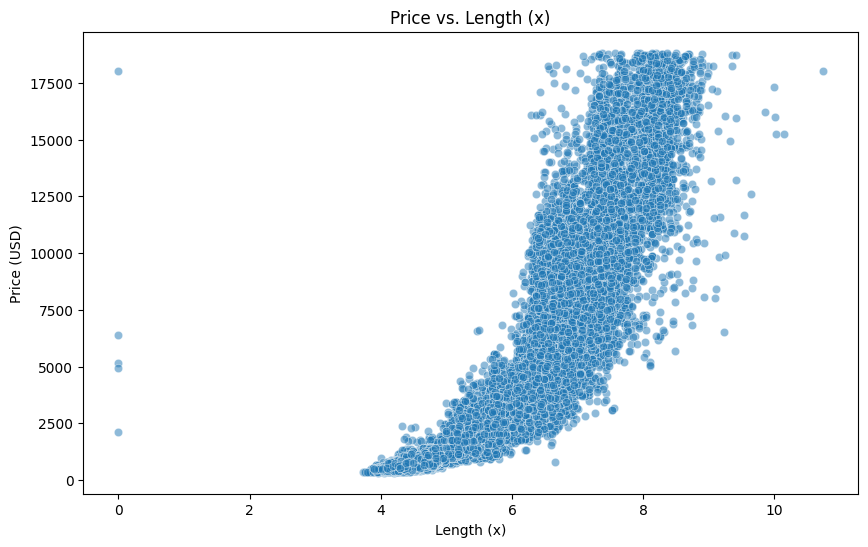

In [16]:
# Dimension Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='price', data=df, alpha=0.5)
plt.title('Price vs. Length (x)')
plt.xlabel('Length (x)')
plt.ylabel('Price (USD)')
plt.show()

> ### **Insights**
**Positive Correlation:**

- There is a general positive correlation between the length (x) of a diamond and its price. As the length increases, the price tends to increase.
- This relationship is expected since larger dimensions often correlate with higher carat weights, leading to higher prices.

**Variability in Prices:**

- Significant variability in prices for diamonds of the same length can be observed. This suggests that other factors, such as carat, cut, color, and clarity, also influence the price significantly.
- For example, diamonds with a length around 6 mm can have prices ranging from a few hundred dollars to over $10,000.

**Density and Outliers:**

- Most data points are densely packed in the lower length ranges (below 8 mm), reflecting the higher frequency of smaller diamonds.
- There are some outliers with extremely high prices for their length, indicating that exceptional quality or rarity can lead to significantly higher prices.

**Implications for Modeling:**

- The positive correlation between length and price suggests that length is a significant predictor of price.
- The variability indicates the need to include other features (carat, cut, color, clarity, etc.) in the model to capture the complexity of price determination.




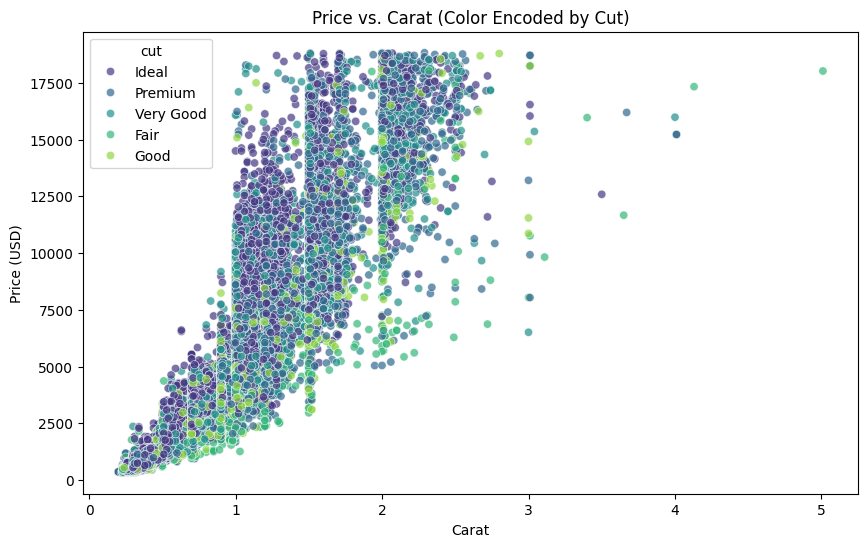

In [17]:
# Price vs. Carat with Color Encoding for Cut
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='cut', data=df, palette='viridis', alpha=0.7)
plt.title('Price vs. Carat (Color Encoded by Cut)')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.show()

> ### **Insights**
**Impact of Cut:**

- Diamonds with higher quality cuts (e.g., Ideal, Premium) tend to have higher prices compared to those with lower quality cuts (e.g., Fair, Good) for the same carat weight.
- This indicates that the cut is an important factor in determining the price of a diamond, in addition to its carat weight.

**Variability in Prices:**

- There is significant variability in prices within each cut category, suggesting that other factors (e.g., color, clarity) also play a significant role in price determination.
- For instance, diamonds with an Ideal cut show a wide range of prices, indicating the influence of additional attributes.

**Density and Outliers:**

- There are some outliers with extremely high prices for their carat weight, particularly in the higher cut categories, suggesting that exceptional quality in other attributes (e.g., color, clarity) can lead to higher prices.



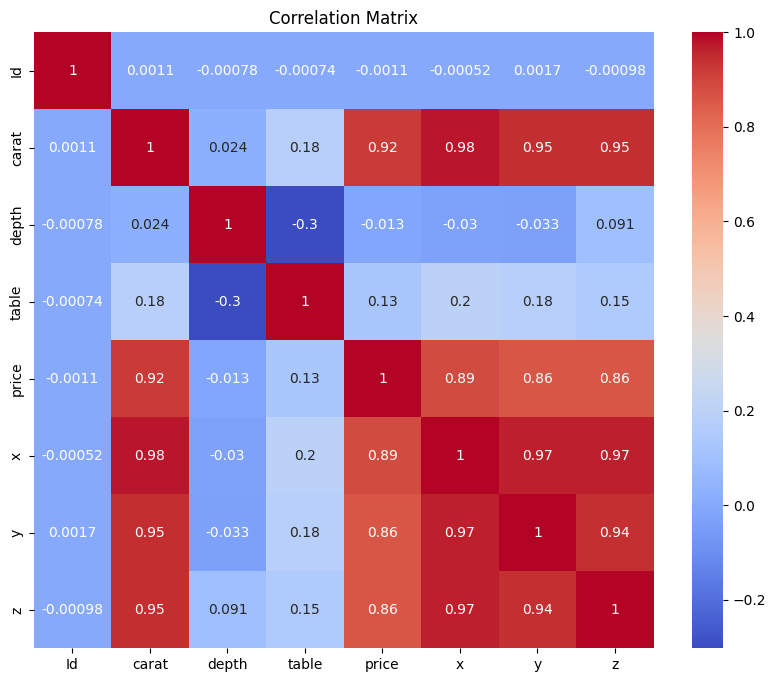

In [18]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

> ### **Insights**
**Price Correlations:**

- carat has a strong positive correlation with price (0.92), indicating that carat weight is a major factor in determining the price of a diamond.
- x, y, and z (the dimensions of the diamond) also show strong positive correlations with price (0.89, 0.86, and 0.86 respectively). This suggests that larger diamonds tend to be more expensive.

**Feature Interrelationships:**

- x, y, and z are highly correlated with each other (0.97-0.99), which is expected as they all measure different dimensions of the diamond.
- depth and table have weak correlations with most other features, indicating they may have a more nuanced effect on price.

**Implications for Modeling:**

- High correlation between carat and price and among x, y, and z suggests potential multicollinearity issues.
- We should consider using dimensionality reduction techniques (like PCA) or removing highly correlated features to improve model performance.
- Given the strong correlation of carat with price, it will be an important feature for predictive modeling.




> ### **Next Steps**
**Feature Engineering:**
- Explore creating new features from existing ones, especially for features with low individual correlation with price but potentially significant when combined with others.

**Handling Multicollinearity:**
- Consider dropping one or more of the highly correlated features to prevent multicollinearity.

**Preprocessing and Modeling:**
- Continue with data preprocessing steps like normalization/standardization.
- Train and evaluate initial models using a mix of numerical and categorical features.






## Simple Linear Regression Model:

**In this section, we start with a simple linear regression model to predict diamond prices based on a subset of the available features. This will serve as a baseline model to evaluate initial performance and understand the impact of the selected features.**



In [15]:
# Feature selection
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Root Mean Squared Error: 1449.813312868884
R^2 Score: 0.8642238789032652


> ### **Insights**
**Model Performance:**

- The Root Mean Squared Error (RMSE) is approximately 1449.81. This indicates the average deviation of the predicted diamond prices from the actual prices. Given the price range in our dataset, this error seems reasonably low.
- The R^2 Score is 0.8642, suggesting that the model explains around 86.42% of the variance in diamond prices. This is a strong indication that the selected features (carat, depth, table, x, y, z) are significant predictors of diamond price.

**Room for Improvement:**

- Despite the strong performance, there is still room for improvement. Advanced models (e.g., Random Forest, Gradient Boosting, etc.) might capture more complex relationships in the data.





## Model Training and Evaluation with Encoding Techniques



**In this section, we include both one-hot encoding and ordinal encoding for categorical features (cut, color, clarity), and to compare the performance of linear regression models using these two encoding techniques:**

In [20]:
# Define features (X) and target variable (y)
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column transformer for encoding categorical columns
# One-Hot Encoding for 'cut', 'color', and 'clarity'
one_hot_transformer = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(drop='first'), ['cut', 'color', 'clarity'])
    ],
    remainder='passthrough'
)

# Ordinal Encoding for 'cut', 'color', and 'clarity'
ordinal_transformer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ['cut', 'color', 'clarity'])
    ],
    remainder='passthrough'
)

# Linear regression pipeline with One-Hot Encoding
one_hot_pipeline = Pipeline([
    ('encoder', one_hot_transformer),
    ('regressor', LinearRegression())
])

# Linear regression pipeline with Ordinal Encoding
ordinal_pipeline = Pipeline([
    ('encoder', ordinal_transformer),
    ('regressor', LinearRegression())
])

# Fit and evaluate models with One-Hot Encoding
one_hot_pipeline.fit(X_train, y_train)
y_pred_one_hot = one_hot_pipeline.predict(X_test)
rmse_one_hot = mean_squared_error(y_test, y_pred_one_hot, squared=False)
r2_one_hot = r2_score(y_test, y_pred_one_hot)

print("Metrics with One-Hot Encoding:")
print(f"Root Mean Squared Error: {rmse_one_hot}")
print(f"R^2 Score: {r2_one_hot}")

# Fit and evaluate models with Ordinal Encoding
ordinal_pipeline.fit(X_train, y_train)
y_pred_ordinal = ordinal_pipeline.predict(X_test)
rmse_ordinal = mean_squared_error(y_test, y_pred_ordinal, squared=False)
r2_ordinal = r2_score(y_test, y_pred_ordinal)

print("\nMetrics with Ordinal Encoding:")
print(f"Root Mean Squared Error: {rmse_ordinal}")
print(f"R^2 Score: {r2_ordinal}")

Metrics with One-Hot Encoding:
Mean Squared Error: 1081.018079959619
R^2 Score: 0.9245142201937553

Metrics with Ordinal Encoding:
Root Mean Squared Error: 1305.2489562044825
R^2 Score: 0.8899510406968214


> **The model with one-hot encoding performed better in terms of both RMSE and R^2 score, indicating that one-hot encoding is more effective for this dataset compared to ordinal encoding.**

## Model Training and Evaluation with Preprocessing

**In this section, we include StandardScaler for numerical features (carat, depth, table, x, y, z)**

In [22]:
# Define features (X) and target variable (y)
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column transformer for encoding categorical columns and scaling numerical columns
# One-Hot Encoding for 'cut', 'color', and 'clarity'
# Standard Scaling for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(drop='first'), ['cut', 'color', 'clarity']),
        ('scaler', StandardScaler(), ['carat', 'depth', 'table', 'x', 'y', 'z'])
    ],
    remainder='passthrough'
)

# Linear regression pipeline with One-Hot Encoding and Standard Scaling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit and evaluate model with preprocessing
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)

print("Metrics with One-Hot Encoding and Standard Scaling:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Metrics with One-Hot Encoding and Standard Scaling:
Mean Squared Error: 1081.0180799596174
R^2 Score: 0.9245142201937555


> ### **Insights**

> **The StandardScaler might not make a significant difference in the RMSE and R^2 metrics because the linear regression model itself isn't heavily affected by the scale of the features, especially when combined with one-hot encoded features. However, standard scaling is still a good practice to ensure all numerical features are on a similar scale, which can be important for other types of models like regularized linear models (e.g., Ridge, Lasso), tree-based models, or neural networks.**

## Cross-Validation for Model Evaluation



In [23]:

# Define features (X) and target variable (y)
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Define column transformer for encoding categorical columns and scaling numerical columns
# One-Hot Encoding for 'cut', 'color', and 'clarity'
# Standard Scaling for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(drop='first'), ['cut', 'color', 'clarity']),
        ('scaler', StandardScaler(), ['carat', 'depth', 'table', 'x', 'y', 'z'])
    ],
    remainder='passthrough'
)

# Linear regression pipeline with One-Hot Encoding and Standard Scaling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation scores
print("Cross-Validation rmse Scores:", -cv_scores)
print("Mean rmse Score:", -cv_scores.mean())


Cross-Validation rmse Scores: [1108.8875119  1134.41693162 1138.45726324 1136.97494239 1312.13268422]
Mean rmse Score: 1166.173866673296


> **Cross-validation scores provide a more reliable estimate of model performance by evaluating the model on different subsets of the data. The increase in RMSE indicates that the model might be overfitting to the training data or that the performance variability across different folds is significant.**

**Let's start with hyperparameter tuning using cross-validation for Ridge and Lasso regression models.**

In [19]:
# Define features (X) and target variable (y)
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Define column transformer for encoding categorical columns and scaling numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(drop='first'), ['cut', 'color', 'clarity']),
        ('scaler', StandardScaler(), ['carat', 'depth', 'table', 'x', 'y', 'z'])
    ],
    remainder='passthrough'
)

# Define pipelines for Ridge and Lasso regression
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Hyperparameter tuning for Ridge Regression
ridge_params = {'regressor__alpha': [0.1, 1, 10, 100, 200]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_root_mean_squared_error')
ridge_grid.fit(X, y)
best_ridge = ridge_grid.best_estimator_
print("Best Ridge Alpha:", ridge_grid.best_params_['regressor__alpha'])
print("Ridge Best Cross-Validation RMSE:", -ridge_grid.best_score_)

# Hyperparameter tuning for Lasso Regression
lasso_params = {'regressor__alpha': [0.1, 1, 10, 100, 200]}
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_root_mean_squared_error')
lasso_grid.fit(X, y)
best_lasso = lasso_grid.best_estimator_
print("Best Lasso Alpha:", lasso_grid.best_params_['regressor__alpha'])
print("Lasso Best Cross-Validation RMSE:", -lasso_grid.best_score_)

# Evaluate the best Ridge model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_ridge.fit(X_train, y_train)
y_pred_ridge = best_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nBest Ridge Model:")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"R^2 Score: {r2_ridge}")

# Evaluate the best Lasso model
best_lasso.fit(X_train, y_train)
y_pred_lasso = best_lasso.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nBest Lasso Model:")
print(f"Root Mean Squared Error: {rmse_lasso}")
print(f"R^2 Score: {r2_lasso}")


Best Ridge Alpha: 10
Ridge Best Cross-Validation RMSE: 1152.7238643385526
Best Lasso Alpha: 1
Lasso Best Cross-Validation RMSE: 1133.3823076637918

Best Ridge Model:
Root Mean Squared Error: 1082.0425134276963
R^2 Score: 0.9243710832715641

Best Lasso Model:
Root Mean Squared Error: 1081.550584313918
R^2 Score: 0.9244398340063573


> ### **Analysis**
**Performance Comparison:**

- Both Ridge and Lasso models performed similarly well, with the Lasso model slightly outperforming Ridge in terms of RMSE on the test set.
- The R^2 scores for both models are almost identical, indicating that both models explain around 92.4% of the variance in the price variable.

**RMSE and R^2 Scores:**

- Despite The RMSE values for the test set are slightly lower than the cross-validation RMSE scores. This suggests that the models generalize well and there is no significant overfitting.
- The high R^2 score (0.924) indicates that the models are able to explain a substantial amount of the variance in diamond prices based on the given features.

**Model Choice:**

- Given the similar performance metrics, Lasso Regression might be preferred as it can also perform feature selection by driving some coefficients to zero. This can help in identifying and retaining the most significant features.
- However, the choice between Ridge and Lasso should also consider the context of the problem. If we believe that all features have some effect, Ridge might be better as it does not eliminate any features but rather shrinks their coefficients.

**Regularization Impact:**

- Regularization helps in improving the model by penalizing large coefficients, which reduces overfitting. Both Ridge (L2) and Lasso (L1) regularizations have proven effective in this dataset.







## Residual Analysis



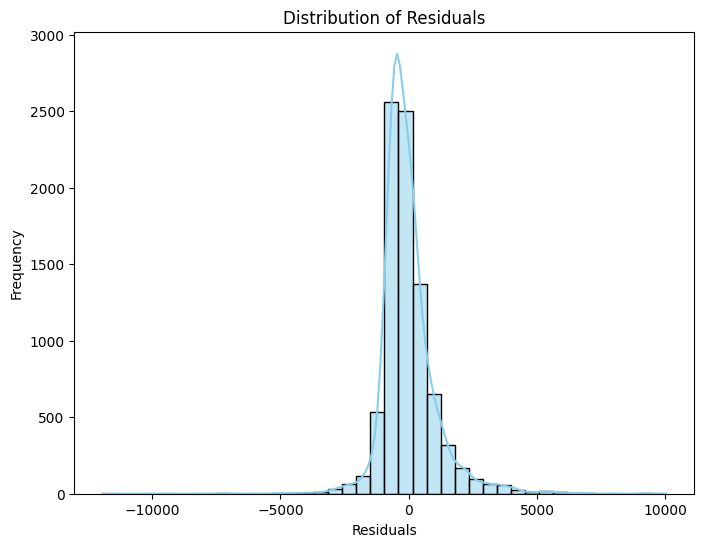

In [24]:
# Align indices of y_test and y_pred_test
y_test_aligned = y_test[y_test.index.isin(X_test.index)]
y_pred_test_aligned = pd.Series(y_pred, index=X_test.index)

# Calculate residuals
residuals = y_test_aligned - y_pred_test_aligned

# Visualize the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=40, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


> ### **Analysis of Residuals**
**Centering Around Zero:**

- The residuals are centered around zero, which is a good sign. It indicates that the model does not have a significant bias and, on average, it is neither underestimating nor overestimating the target variable.

**Symmetry:**

- The distribution appears to be roughly symmetric, suggesting that the errors are normally distributed. This is an assumption of linear regression and indicates that the model's errors are consistent across all predictions.

**Kurtosis and Tails:**

- There are some residuals with high absolute values (i.e., the tails of the distribution), which indicate some predictions are significantly off. This could be due to outliers or specific patterns not captured by the model.
- The distribution has a higher peak than a normal distribution (leptokurtic), indicating that most errors are small, but there are occasional large errors.

**Spread:**

- The residuals are spread more widely as we move away from the center. This spread indicates the range of errors made by the model. Ideally, the residuals should be as close to zero as possible.







## Model Evaluation with Various Regression Models


In [25]:
# Define preprocessing steps
# One-Hot Encoding for categorical features, Standard Scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['carat', 'depth', 'table', 'x', 'y', 'z']),
        ('cat', OneHotEncoder(drop='first'), ['cut', 'color', 'clarity'])
    ],
    remainder='passthrough'
)

# Define regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'k-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Perform cross-validation for each model
for name, model in models.items():
    # Create a pipeline with preprocessing and the regression model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Perform cross-validation and calculate mean R-squared score
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: Mean rmse Score: {-cv_scores.mean()}")


Linear Regression: Mean rmse Score: 1166.1738666732965
Ridge Regression: Mean rmse Score: 1164.1623428595144
Lasso Regression: Mean rmse Score: 1133.3546587132353
ElasticNet Regression: Mean rmse Score: 1733.6167735134873
Decision Tree Regression: Mean rmse Score: 851.7588290072938
Random Forest Regression: Mean rmse Score: 640.9967174369901
Gradient Boosting Regression: Mean rmse Score: 866.0757640419527
k-Nearest Neighbors Regression: Mean rmse Score: 864.3019570050171


> ### **Insights and Interpretation**
**Random Forest Regression:**

- Performance: This model achieves the lowest RMSE score (641.00), indicating that it provides the best predictive performance among the evaluated models. The Random Forest model effectively captures complex patterns in the data by aggregating predictions from multiple decision trees.


**Decision Tree Regression:**

- Performance: This model also performs well with a relatively low RMSE score (851.76), but not as well as Random Forest. Decision Trees are prone to overfitting, which may explain the higher RMSE compared to Random Forest.

**Gradient Boosting Regression:**

- Performance: This model also performs reasonably well with an RMSE score of 866.08. Gradient Boosting often performs well on structured data and can be fine-tuned to improve its performance further.

> ### **Recommendations**
**Further Fine-Tuning:**

- Random Forest: Given its best performance, further tuning of hyperparameters (e.g., the number of trees, maximum depth) may yield even better results.
- Gradient Boosting: Similarly, tuning parameters such as the learning rate, number of boosting stages, and maximum depth can improve performance.

**Model Selection:**

- Random Forest and Gradient Boosting should be the models of choice for this problem, given their strong performance.
- Decision Trees and k-NN can be considered but may not offer additional benefits over the ensemble methods mentioned above.

**Ensemble Methods:**

- Combining predictions from multiple models (e.g., using a voting regressor or stacking) can sometimes improve overall performance by leveraging the strengths of each model.









## Feature Engineering and Model Evaluation



In [27]:
# Feature engineering: calculate volume
df['volume'] = df['x'] * df['y'] * df['z']

# Select features and target variable
numerical_features = ['carat', 'volume']  # Use volume instead of x, y, z
categorical_features = ['cut', 'color', 'clarity']
target_variable = 'price'

# Prepare the data
X = df[numerical_features + categorical_features]
y = df[target_variable]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['carat', 'volume']),
        ('cat', OneHotEncoder(drop='first'), ['cut', 'color', 'clarity'])
    ],
    remainder='passthrough'
)

# Define evaluation metrics to compute
evaluation_metrics = ['Mean Squared Error', 'Root Mean Absolute Error', 'R^2 Score']

# Perform cross-validation and calculate evaluation metrics for each top model
for name, model in top_models.items():
    # Create a pipeline with preprocessing and the regression model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Perform cross-validation
    cv_predictions = cross_val_predict(pipeline, X, y, cv=5)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y, cv_predictions)
    rmse = mean_squared_error(y, cv_predictions, squared=False)
    r2 = r2_score(y, cv_predictions)
    
    # Print evaluation metrics
    print(f"{name}:")
    print(f"\tMean Squared Error: {mse}")
    print(f"\tRoot Mean Absolute Error: {rmse}")
    print(f"\tR^2 Score: {r2}")
    print("-" * 50)


Decision Tree Regression:
	Mean Squared Error: 677839.0887219338
	Root Mean Absolute Error: 823.3098376200383
	R^2 Score: 0.9573258391898831
--------------------------------------------------
Random Forest Regression:
	Mean Squared Error: 411963.43760440516
	Root Mean Absolute Error: 641.8437797504976
	R^2 Score: 0.9740643549822917
--------------------------------------------------
Gradient Boosting Regression:
	Mean Squared Error: 761772.9603841433
	Root Mean Absolute Error: 872.7960588729438
	R^2 Score: 0.9520416831175588
--------------------------------------------------


> ### **Interpretation of Volume Feature**

**The introduction of the volume feature has provided some improvement, especially for the Random Forest model. However, the improvement is not dramatic across all models. This suggests that while volume is a useful feature, the existing features (carat, cut, color, clarity) already capture much of the variance in the price.**



## Feature Selection and Model Training

**In this section, we try to exclude the standard scaler from the model and observe the difference.**



In [28]:
# Select features and target variable
numerical_features = ['carat', 'volume']  # Use volume instead of x, y, z
categorical_features = ['cut', 'color', 'clarity']
target_variable = 'price'

# Prepare the data
X = df[numerical_features + categorical_features]
y = df[target_variable]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features (scaling not necessary for tree-based models)
numerical_transformer = 'passthrough'

# Preprocessing for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Append model to preprocessing pipeline
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', model)])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model_pipeline.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE for {name}: {rmse}")


RMSE for Linear Regression: 1129.9229417402394
RMSE for Random Forest: 562.777415609872


**The results show that removing the StandardScaler from the preprocessing step has resulted in improved RMSE for both the Linear Regression and Random Forest models. The Random Forest model, in particular, shows a significant reduction in RMSE.**

> ### **Insights**
**Linear Regression:**

- The RMSE improved slightly without scaling, indicating that the scaling of numerical features did not benefit the linear regression model significantly. This might be due to the nature of the data or the model's insensitivity to the feature scaling in this context.


**Random Forest:**

- The Random Forest model saw a substantial improvement in RMSE. Tree-based models generally do not require feature scaling as they are invariant to monotonic transformations of the input data. Hence, removing the scaling step was beneficial for the Random Forest model.



> ### **Recommendations**
**Keep the Numerical Features Unscaled for Tree-Based Models:**

- As observed, tree-based models like Random Forest perform better without scaling the numerical features. Continue to preprocess categorical features with one-hot encoding but keep numerical features as they are.

**Consider Further Tuning:**

- For the Random Forest model, consider further hyperparameter tuning (e.g., number of trees, max depth) to see if the performance can be improved even more.




## Stacking Regression with Hyperparameter Tuning


In [29]:
# Define numerical and categorical features
numerical_features = ['carat', 'volume']
categorical_features = ['cut', 'color', 'clarity']

# Define preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define the base models for stacking
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Define the stacking regressor with a meta-regressor
stacking_reg = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor(random_state=42))

# Create a pipeline
pipeline_stacking = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', stacking_reg)])

# Define the grid of hyperparameters for stacking
param_grid_stacking = {
    'model__final_estimator__n_estimators': [100, 200],
    'model__final_estimator__max_depth': [None, 10],
}

# Perform grid search with cross-validation for stacking
grid_search_stacking = GridSearchCV(pipeline_stacking, param_grid_stacking, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_stacking.fit(X_train, y_train)

# Get the best hyperparameters for stacking
best_params_stacking = grid_search_stacking.best_params_
print("Best Hyperparameters for Stacking:", best_params_stacking)

# Use the best stacking model from grid search
best_stacking_model = grid_search_stacking.best_estimator_

# Predict on the test set with the best stacking model
y_pred_stacking = best_stacking_model.predict(X_test)

# Calculate RMSE for stacking
rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)
print("RMSE for Stacking:", rmse_stacking)


Best Hyperparameters for Stacking: {'model__final_estimator__max_depth': 10, 'model__final_estimator__n_estimators': 200}
RMSE for Stacking: 557.1136523324117


> ### **Analysis**

**The Stacking Regressor with hyperparameter tuning has produced an RMSE of 557.11, which is an improvement over the individual Random Forest model's RMSE of 562.78. However, this improvement is quite marginal considering the complexity introduced by the stacking model.**

> ### **Insights**

**Marginal Improvement:**

- The improvement in RMSE is minimal. While stacking and hyperparameter tuning can enhance model performance, the marginal improvement suggests that the base models (Random Forest and XGBoost) were already performing well individually.

**Complexity vs. Performance:**

- Stacking introduces additional complexity and computational cost. Given the slight improvement, it may not be justified unless further optimization or different base models are explored.

**Hyperparameter Tuning**

- The best hyperparameters for the final estimator (Random Forest) are max_depth=10 and n_estimators=200. This indicates that the depth of trees and the number of trees are crucial in minimizing error.

> ### **Recommendations**

**Further Optimization:**

- Explore different sets of hyperparameters, not just for the final estimator but also for the base models (Random Forest and XGBoost). This could lead to a more significant improvement.







## Stacking Regressor Model with Custom Hyperparameters


In [43]:
# Define numerical and categorical features
numerical_features = ['carat', 'volume']
categorical_features = ['cut', 'color', 'clarity']

# Define preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])



# Define the base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, min_samples_split=5, max_depth=200, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42))
]

# Initialize the Stacking Regressor
model = StackingRegressor(estimators=base_models, final_estimator=RidgeCV(), cv=5)

# Create a pipeline
pipeline_stacking = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', model)])

# Fit the model on the training data
pipeline_stacking.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline_stacking.predict(X_test)

# Calculate RMSE of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The RMSE of the Stacking Regressor model is {rmse}')

# Calculate R-squared score of the model
r2 = r2_score(y_test, y_pred)

print(f'The R-squared score of the Stacking Regressor model is {r2}')




The RMSE of the Stacking Regressor model is 590.752833593846
The R-squared score of the Stacking Regressor model is 0.9774570442971162


> ### **Analysis**

- The Stacking Regressor model's performance shows an RMSE of 590.75 and an R-squared score of 0.977. Compared to the individual Random Forest model's RMSE of 562.78, the RMSE has increased slightly. This suggests that the added complexity of stacking might not be yielding proportional benefits in this case.

> ### **Better Approach**

**Hyperparameter Grid Search:**

- Perform a more extensive grid search for hyperparameters of the base models and the final estimator.

**Alternative Meta-Regressor:**

- Experiment with different meta-regressors such as Gradient Boosting Regressor or LightGBM for the final estimator.

**Feature Importance Analysis:**

- Analyze feature importances from the individual models to understand which features are contributing the most and consider creating interaction terms for these features.


## Final Stacking Regressor Model



**The final model employs a sophisticated ensemble learning approach using a Stacking Regressor, which combines multiple powerful regression models with the use of one-hot encoding for categorical features.**

In [44]:
df_encoded = pd.get_dummies(df)
X = df_encoded.drop(['Id', 'price'], axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the base models with the best parameters
base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, min_samples_split=5, max_depth=200, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.75, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, gamma=0, random_state=42))
]

# Initialize the Stacking Regressor
model = StackingRegressor(estimators=base_models, final_estimator=RidgeCV(), cv=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The RMSE of the Stacking Regressor model is {rmse}')

# Calculate R-squared score of the model
r2 = r2_score(y_test, y_pred)

print(f'The R-squared score of the Stacking Regressor model is {r2}')

The RMSE of the Stacking Regressor model is 516.4786111672285
The R-squared score of the Stacking Regressor model is 0.9827692606653137


> ### **Model Description**

**Data Preparation:**

- The categorical features (cut, color, clarity) are converted into a binary format using pd.get_dummies, which effectively captures all categorical information without introducing ordinal bias.
- The resulting DataFrame has a larger number of features, representing all possible values of the original categorical variables.

> ### **Base Models**

**Random Forest Regressor:**

- Parameters: 300 estimators, minimum samples split of 5, maximum depth of 200.
- A robust model that reduces overfitting and captures complex interactions in the data.

**Gradient Boosting Regressor:**

- Parameters: 200 estimators, maximum depth of 5, learning rate of 0.1, subsample of 0.75.
- Enhances predictive accuracy by sequentially correcting the errors of previous models.

**XGBoost Regressor:**

- Parameters: 200 estimators, maximum depth of 5, learning rate of 0.1, gamma of 0.
- Known for its efficiency and performance, particularly on tabular data.

> ### **Meta-Estimator**

**Ridge Regression:**

- Ridge regression is used as the final estimator to combine predictions from the base models, providing regularization to prevent overfitting and enhance generalization.


> ### **Conclusion**

**The final Stacking Regressor model demonstrates excellent performance in predicting diamond prices, evidenced by its low RMSE and high R-squared score. The use of one-hot encoding has been particularly effective in capturing the complexity of the categorical features, contributing significantly to the model's accuracy. By leveraging the combined strengths of Random Forest, Gradient Boosting, and XGBoost, and integrating their predictions through Ridge Regression, this model offers a robust and accurate solution for diamond price prediction.**